## Final Project Submission

Please fill out: kolol christine
* Student name: 
* Student pace:  full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [3]:
# Your code here - remember to use markdown cells for comments as well!

Microsoft is looking into venturing into film production and have decided to come up with a Movie Studio.The major setback is they do not have prior knowledge in the industry. this project aims into shedding light to the stakeholder by identifying films that are successful in the market. The objective is to help Microsoft decide on the films they will major into. Objectives: To identify top watched movies based on their popularity

In [32]:
import pandas as pd
import sqlite3
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

Doing explanatory data  anaylsis and cleaning the movie database, trying to get insights on the most popular movies, they relationship with genre, popularity and vote_count

In [33]:
movies_df= pd.read_csv("zippedData/tmdb.movies.csv.gz")

In [34]:
movies_df.set_index("id", inplace=True)

In [35]:
movies_df.head(10)

,Unnamed: 0,genre_ids,original_language,original_title,popularity,release_date,title,vote_average,vote_count
id,,,,,,,,,
12444,0,"[12, 14, 10751]",en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
10191,1,"[14, 12, 16, 10751]",en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
10138,2,"[12, 28, 878]",en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
862,3,"[16, 35, 10751]",en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
27205,4,"[28, 878, 12]",en,Inception,27.920,2010-07-16,Inception,8.3,22186
32657,5,"[12, 14, 10751]",en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
19995,6,"[28, 12, 14, 878]",en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
10193,7,"[16, 10751, 35]",en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
20352,8,"[16, 10751, 35]",en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057


Cleaning the dataframe by removing the "Unnamed: 0" column because its redundant

In [36]:
movies_df.drop("Unnamed: 0", axis=1, inplace= True)

In [37]:
movies_df.columns  # we can see that the redunadant column is removed.

Index(['genre_ids', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

the data type consists of numerical, categorical data types.

In [38]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26517 entries, 12444 to 309885
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   original_language  26517 non-null  object 
 2   original_title     26517 non-null  object 
 3   popularity         26517 non-null  float64
 4   release_date       26517 non-null  object 
 5   title              26517 non-null  object 
 6   vote_average       26517 non-null  float64
 7   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 1.8+ MB


In [39]:
movies_df.duplicated()

id
12444     False
10191     False
10138     False
862       False
27205     False
          ...  
488143    False
485975    False
381231    False
366854    False
309885    False
Length: 26517, dtype: bool

We are gonna check the variety of language used in the acting

In [40]:
language_counts = movies_df['original_language'].value_counts()[:10]

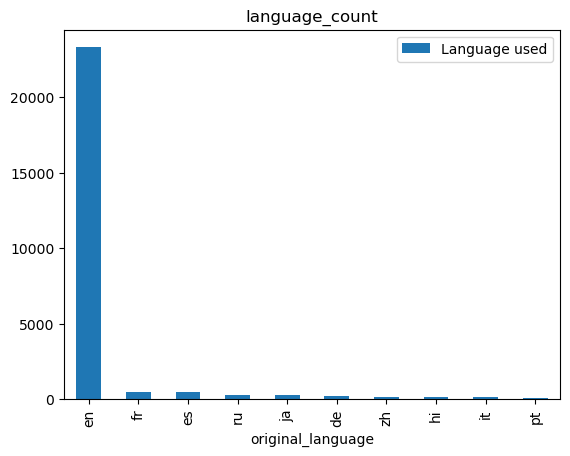

In [41]:
language_counts.plot(kind= 'bar')
plt.title("language_count")
plt.legend(["Language used"])
plt.savefig("zippedData\language_count.png")

From the above we can conclude that most of the acted movies target english audience

In [42]:
#check for duplicates
movies_df.duplicated().value_counts()

False    25497
True      1020
Name: count, dtype: int64

We are gonna extract from the moviesreview.csv and make a df from it ..analyse the data and come up with recommendation

In [70]:
movies_budget_df =pd.read_csv("zippedData/tn.movie_budgets.csv.gz", delimiter=",")

In [71]:
movies_budget_df.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [72]:
movies_budget_df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [73]:
movies_budget_df.shape
#shape of dataframe

(5782, 6)

In [74]:
movies_budget_df.boxplot

<bound method boxplot_frame of       id  release_date                                        movie  \
0      1  Dec 18, 2009                                       Avatar   
1      2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2      3   Jun 7, 2019                                 Dark Phoenix   
3      4   May 1, 2015                      Avengers: Age of Ultron   
4      5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   
...   ..           ...                                          ...   
5777  78  Dec 31, 2018                                       Red 11   
5778  79   Apr 2, 1999                                    Following   
5779  80  Jul 13, 2005                Return to the Land of Wonders   
5780  81  Sep 29, 2015                         A Plague So Pleasant   
5781  82   Aug 5, 2005                            My Date With Drew   

     production_budget domestic_gross worldwide_gross  
0         $425,000,000   $760,507,625  $2,776,345,279  
1   

In [75]:
movies_budget_df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [76]:
movies_budget_df['movie'].duplicated().value_counts()

movie
False    5698
True       84
Name: count, dtype: int64

In [77]:
movies_budget_df['production_budget'].describe()

count            5782
unique            509
top       $20,000,000
freq              231
Name: production_budget, dtype: object

In the budget dataframe, its imparative to see how the variables are related. Using the visualization toolsin our disposal heatmap and scatter plot will suffice.

In [78]:
movies_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In order to use correlation we ought to check the datatype of the dataframe object. and convert to numeric type

In [79]:
movies_budget_df.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [80]:
movies_budget_df['production_budget']= movies_budget_df['production_budget'].str.replace("$","")

In [81]:
movies_budget_df['domestic_gross']= movies_budget_df['domestic_gross'].str.replace("$","")

In [82]:
movies_budget_df['worldwide_gross']= movies_budget_df['worldwide_gross'].str.replace("$","")

In [83]:
movies_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"425,000,000","760,507,625","2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"410,600,000","241,063,875","1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"350,000,000","42,762,350","149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"330,600,000","459,005,868","1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"317,000,000","620,181,382","1,316,721,747"


In [84]:
# wordwide_gross = np.random.randint(2776345279,1045663875,149762350,1403013963,)
# production_budget = np.random.randint(425000000,410600000,350000000,330600000,)
#create heatmap
# plt.colorbar(label= 'Number of Movies')
# plt.xlabel ('production_budget')
# plt.ylabel('worldwide_gross')
# plt.title('heatmap of production budget vs worldwide gross')

# plot 
# plt.show()
           

In [85]:
movies_budget_df['production_budget']= movies_budget_df['production_budget'].str.replace("$","", regex= True).astype(float)

ValueError: could not convert string to float: '425,000,000'

In [86]:
movies_budget_df['worldwide_gross']= movies_budget_df['worldwide_gross'].str.replace("$","", regex= True).astype(float)

ValueError: could not convert string to float: '2,776,345,279'

In [87]:
#create heatmap
plt.figure=(10,6)
plt.hist2d(df['production_budget'],df['worldwide_gross'], bins(20,20), cmap=plt.cm.Reds)

# labels and title
plt.colorbar(label='number of movies')
plt.xlabel('production_budget')
plt.ylabel('worldwide_gross')
plt.title('production vs worldwide gross')

# showplot
plt.show()

NameError: name 'df' is not defined